# Preface

In March of 2019, my boyfriend decided that he wanted to buy a used Lexus RCF. He found the car of his dreams - gray interior, silver paint and orange calipers - the only catch was that it was kind of out of his price range and it was in Tennesse. The location was not a problem, I was just thinking about using some vacation time to visit a friend who lives there, so I could go, test drive the car and negotiate that car down to the price he was willing to pay. To support my negotiation, I decided to do a pricing analysis of this car to see if we were truly getting the best deal. 

My boyfriend collected data on all the RCF's that were on sale at that time from Autotrader.com and I did my analysis with the help of pandas, numpy and some scikit learn. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [3]:
data = pd.read_excel('rcf data.xlsx', index_col='vin')

In [4]:
data.head()

,color,carfax,certified,interior,location,mileage,price,kelly,year,url,calipers,wheels
vin,,,,,,,,,,,,
S4S0NB4GHD4D1,silver,yes,yes,gray,"0 (sacramento, ca)",30000,40000,great,2016,https://www.autotrader.com/cars-for-sale/Certi...,orange,black
JTHHP5BC6F5002753,gray,na,na,red,"2072 (marietta, ga)",22465,40650,great,2015,https://www.autotrader.com/cars-for-sale/vehic...,black,spikey
JTHHP5BC6K5007042,matte gray,https://www.carfax.com/VehicleHistory/ar20/1lR...,na,blue,"1460 (austin, tx)",6191,68788,na,2019,https://www.autotrader.com/cars-for-sale/vehic...,blue,black spikey
JTHHP5BC2H5006477,black,https://www.carfax.com/VehicleHistory/ar20/yB0...,yes,black,"2384 (towson, md)",20676,54617,great,2017,https://www.autotrader.com/cars-for-sale/vehic...,orange,spikey
na,red,https://www.carfax.com/VehicleHistory/ar20/WEp...,yes,black,"859 (albuquerque, nm)",31806,49000,na,2015,https://www.autotrader.com/cars-for-sale/vehic...,black,black


In [6]:
print("There are", len(data),"different vehicles in this data set.")

There are 104 different vehicles in this data set.


Goals for Analysis:
1. What's the distribution of prices for all the cars?
2. Average price of RCF in TN
3. Distrubution of mileage
4. Mileage vs. Price
5. Color vs Price 
6. Year vs. Price

## Step 1. Cleaning and Restructuring

In [7]:
#but first, we need to split the location into distance and location
location = data['location'].str.replace('(', '' )
location = location.str.replace(')', '')
location = location.to_frame()
distance = location['location'].str.split(' ',n=1, expand=True)
city = distance[1].str.split(',', n=1, expand=True)
city.columns = ['city', 'state']


In [8]:
data['distance']= distance[0]
data['city'] = city['city']
data['state'] = city['state']
data.drop(['url','location'], axis=1, inplace=True)

## Step 2. Vizualize Prices

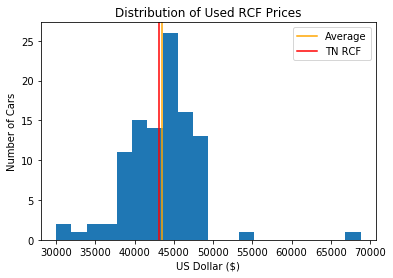

In [6]:
plt.hist(data['price'], bins=20)
plt.axvline(x= data['price'].mean(), ymax=25, color='orange', label='Average')
plt.axvline(x = 43150, color='red', label='TN RCF')
plt.xlabel('US Dollar ($)')
plt.ylabel('Number of Cars')
pyplot.legend()
plt.title('Distribution of Used RCF Prices');

plt.show()

Unfortunately, the car that he wanted (TN RCF) is already priced below the average price of the data set and is below the median price. So only based on price, this car is a good deal

In [9]:
data[data['state'] == ' tn']

,color,carfax,certified,interior,mileage,price,kelly,year,calipers,wheels,distance,city,state
vin,,,,,,,,,,,,,
JTHHP5BC7G5005436,silver,https://www.carfax.com/VehicleHistory/ar20/vnd...,na,gray,38478,43150,great,2016,orange,black,1759,memphis,tn
JTHHP5BC6F5002610,orange,https://www.carfax.com/VehicleHistory/ar20/dXB...,yes,black,3803,47493,good,2015,black,spikey,1901,nashville,tn
JTHHP5BC0F5002134,silver,na,na,black,23300,47901,na,2015,black,spikey,2052,knoxville,tn


Wow, it is even the cheapest of the three you have from Tennessee.

OK maybe we have better luck with mileage

## Step 3. Vizualize the Mileage

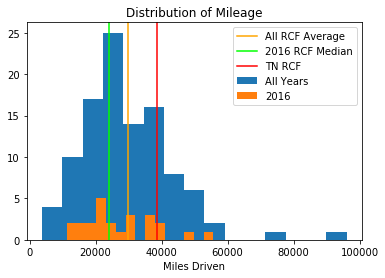

In [10]:
pyplot.hist(data['mileage'], bins=15, label='All Years')
pyplot.hist(data[data['year'] ==2016]['mileage'], bins=15, label='2016')
plt.xlabel('Miles Driven')
plt.title('Distribution of Mileage')
plt.axvline(x= data['mileage'].mean(), color='orange', label ='All RCF Average')
plt.axvline(x= data[data['year'] ==2016]['mileage'].median(), color='lime', label ='2016 RCF Median')
plt.axvline(x=38478, color='red', label='TN RCF')
pyplot.legend()

plt.show()

GREAT NEWS. This histogram tells us a lot of information. Let's start with the big blue all years histogram - this tells us that most cars have mileage around 25k, which is much lower than the car that you want. Now, let's move onto the orange histogram, which are only the 2016 RCFs. Of those, it seems like the most common mileage is still around 20k. Great, so the car that you want has about double the mileage of average. How can we further quantify that difference?


My inutition is that having 20k extra miles on it than average should lower the price by at least a few thousand... now I just need to find out the relationship between mileage and price to truly put a unit value on it. perhaps do some linear regression?

In [9]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [-0.18553235]
Mean squared error: 9619014.67
Variance score: -3.31


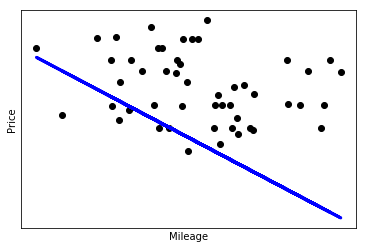

In [10]:
# Use only one feature
mileage = data[['mileage']]

# Split the data into training/testing sets
x_train = mileage[:-50]
x_test = mileage[-50:]

# Split the targets into training/testing sets
y_train = data.price[:-50]
y_test = data.price[-50:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())

plt.show()

Based on linear regression, the coefficient we got for the mileage is -0.185...
This means that for every additional mile the car has than the average, the price falls by 18 cents. 
Threrefore, 20k * .18 =

In [11]:
20000*-0.18553235


-3710.6470000000004

Just based on the mileage, we should subtract another 3700 from the cost. BOOM BAZZLE

In [12]:
43150-(20000*0.18553235)

39439.353

# Step 4: Do some more misc. data visualizations

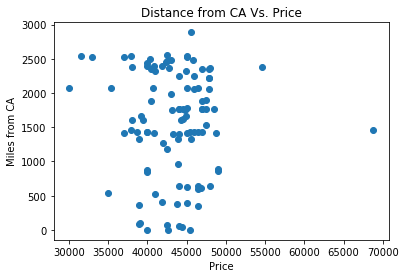

In [18]:
pyplot.scatter(data.price, data.distance)

plt.xlabel('Price')
plt.ylabel('Miles from CA')
plt.title('Distance from CA Vs. Price')
plt.show()


Seems like regardless of the distance from CA, most cars still fall within the 40-50k range. There are a few outliers that have sold for less than 35k though so lets look at those in more detail

In [20]:
under40k = data[data['price'] <40000]

under40k

,color,carfax,certified,interior,mileage,price,kelly,year,calipers,wheels,distance,city,state
vin,,,,,,,,,,,,,
JTHHP5BC5F5002890,red,https://www.carfax.com/VehicleHistory/ar20/Xgi...,na,gray,45219,39998,good,2015,black,black,1432,carrollton,tx
JTHHP5BC6F5002171,white,na,na,red,96045,29995,na,2015,black,spikey,2075,smyrna,ga
JTHHP5BC5F5002257,black,na,na,red,28110,31500,na,2015,black,white,2535,boca raton,fl
JTHHP5BC8F5001801,red,na,na,black,12600,33000,na,2015,red,white,2532,pompano beach,fl
JTHHP5BC0F5002053,black,https://www.carfax.com/VehicleHistory/ar20/L77...,na,red,35092,35000,na,2015,black,spikey,534,lindon,ut
JTHHP5BCXF5002545,black,https://www.carfax.com/VehicleHistory/ar20/GuW...,na,black,56250,35390,great,2015,teal,black,2078,rosswell,ga
JTHHP5BC3F5001141,red,https://www.carfax.com/VehicleHistory/ar20/TLs...,na,black,37307,36990,great,2015,black,spikey,1418,santa clarita,ca
JTHHP5BC4F5000418,white,na,na,black,26224,36999,na,2015,black,white,2533,north lauderdale,fl
na,blue,na,na,red,75580,37900,na,2015,black,black,2546,miami,fl


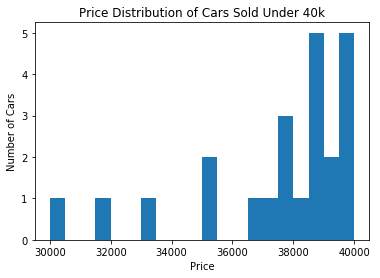

In [23]:
plt.hist(under40k['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Cars')
plt.title('Price Distribution of Cars Sold Under 40k')
plt.show()

In the rare occasion that the price was below 30k, it was because the car almost had 100k miles on it. All cars listed under 40k are from 2015. Most cars are within a reasonable mileage range too, so I think it would still be fair to get the 2016 car are around 40k because it has the mileage of most cars that have that same mileage. 

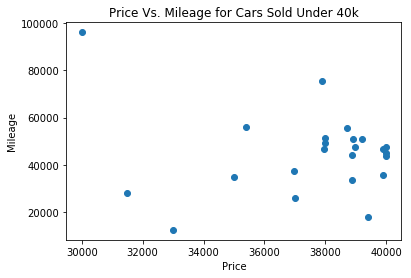

In [25]:
plt.scatter(under40k.price, under40k.mileage)
plt.xlabel('Price')
plt.ylabel('Mileage')
plt.title('Price Vs. Mileage for Cars Sold Under 40k')
plt.show()

Sometimes, you just make a graph and you really can't draw any conclusions from it. This is one of those times.

Now, I'm just manipulating the data to find out any interesting information between the color of the car and median price or median mileage. I chose the median over mean in this case because the distribution of this curve is not normal. Had the data set been normally distributed, a mean would be a good metric to use.

In [22]:
new = data.groupby('color').median()
new.reset_index(inplace=True)

new

,color,mileage,price,year
0,black,26485.0,43994.0,2015.0
1,blue,36735.0,41900.0,2015.0
2,gray,30501.0,42996.5,2015.0
3,matte gray,6191.0,68788.0,2019.0
4,orange,30528.0,43991.0,2015.0
5,red,22648.0,44495.0,2015.0
6,silver,23953.0,44950.0,2015.0
7,white,28392.5,43995.5,2015.0


From this we learned that the most expensive color is matte gray and the least expensive color is blue. We also learned that blue cars have the highest mileage, which probably leads to lower prices. Does having a blue car make you want to drive it more? Probably not, but could be a fun study to follow up with :)

# Conclusion 

So this was a small sample size, but this was the actual population of the used RCF's for sale so I guess these are some pretty reasonable/trustworthy findings. Unfortunately, the dealership could not have given less of a hoot about my analysis and we only negotiated for like $300 less.. but hey that's better than my dad who couldn't get a dime off of his used Lexus.. so I'll take that as a win. 
 

# Limitations


The regression coming at an RMSE of 9619014.67 is not good at all. This means that the regression is a terrible fit and is off by $9M at any given guess of the price given the mileage. The R squared in this case also doesn't make any sense since it's outside the values of 0-1 and is likely due to the small sample size and decreasing trend.